### ノック71：人間関係のネットワークを可視化してみよう

In [13]:
import pandas as pd
df_links = pd.read_csv('links.csv')

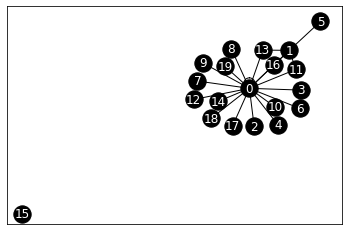

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
NUM = len(df_links.index)
for i in range(1, NUM + 1):
    node_no = df_links.columns[i].strip('Node')
    # print(node_no)
    G.add_node(str(node_no))

# 辺の設定
for i in range(NUM):
    for j in range(NUM):
        # print(i, j)
        node_name = 'Node' + str(j)
        if df_links[node_name].iloc[i] == i:
            G.add_edge(str(i), str(j))

# 描画
nx.draw_networkx(G, node_color='k', edge_color='k', font_color='w')
plt.show()

### ノック72：クチコミによる情報伝播の様子を可視化してみよう

In [15]:
import numpy as np

In [16]:
def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val <= percent:
        return 1
    else:
        return 0

In [17]:
def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i] == i:
            for j in range(num):
                node_name = 'Node' + str(j)
                if df_links[node_name].iloc[i] == 1:
                    if determine_link(percent_percolation) == 1:
                        list_active[j] = i
    return list_active

In [18]:
percent_percolation = 0.1
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

In [19]:
def active_node_coloring(list_active):
    # print(list_timeSeries[t])
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i] == 1:
            list_color.append('r')
        else:
            list_color.append('k')
    return list_color

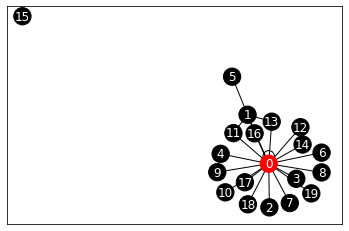

In [20]:
t = 0
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

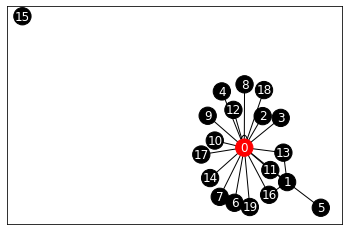

In [21]:
t = 10
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

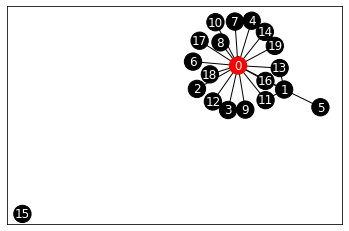

In [25]:
t = 99
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

### ノック73：口コミ数の時系列変化をグラフ化してみよう

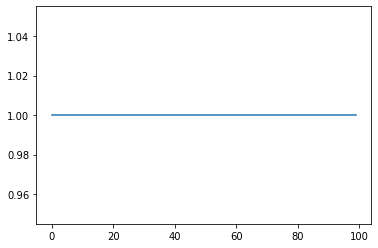

In [23]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

### ノック74：会員数の時系列変化をシミュレーションしてみよう

In [26]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links):
    # 拡散
    for i in range(num):
        if list_active[i] == i:
            for j in range(num):
                if df_links.iloc[i][j] == 1:
                    if  determine_link(percent_disapparence) == 1:
                        list_active[j] = 1
    
    # 消滅
    for i in range(num):
        if determine_link(percent_disapparence) == 1:
            list_active[i] = 0
    return list_active

In [28]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
    list_timeSeries.append(list_active.copy())

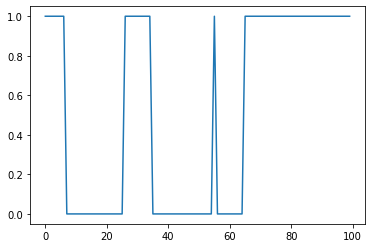

In [29]:
# 時系列グラフを描く
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

In [30]:
percent_disapparence = 0.2
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
    list_timeSeries.append(list_active.copy())

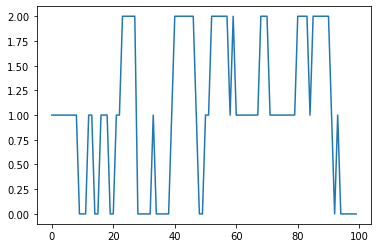

In [31]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

### ノック75：パラメータの全体像を、「相図」を見ながら把握しよう

In [34]:
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram, NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05 * i_p
        percent_disapparence = 0.05 * i_p
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)

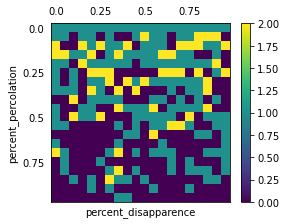

In [36]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False, left=False, right=False, top=False)
plt.show()

### ノック76：実データを読み込んでみよう

In [38]:
df_mem_links = pd.read_csv('links_members.csv')
df_mem_info = pd.read_csv('info_members.csv')

### ノック77：リンク数の分布を可視化しよう

In [39]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links['Node' + str(i)])

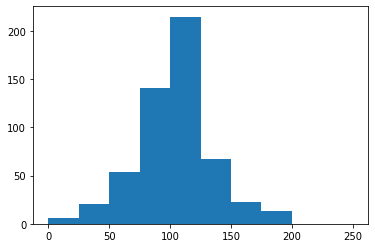

In [40]:
plt.hist(array_linkNum, bins=10, range=(0, 250))
plt.show()

### ノック78：シミュレーションのために実データからパラメータを推定しよう

In [42]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns) - 1

# 消滅の確率推定
count_active = 0
count_active_to_inactive = 0
for t in range(1, T_NUM):
    for i in range(NUM):
        if (df_mem_info.iloc[i][t] == 1):
            count_active_to_inactive += 1
            if (df_mem_info.iloc[i][t+1] == 0):
                count_active += 1
estimated_percent_disapparence = count_active / count_active_to_inactive

In [43]:
# 拡散の確率推定
count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM - 1):
    df_link_t = df_mem_info[df_mem_info[str(t)] == 1]
    temp_flag_count = np.zeros(NUM)
    for i in range(len(df_link_t.index)):
        df_link_temp = df_mem_links[df_mem_links['Node' + str(df_link_t.index[i])] == 1]
        for j in range(len(df_link_temp.index)):
            if (df_mem_info.iloc[df_link_temp.index[j]][t] == 0):
                count_link += 1
            if (df_mem_info.iloc[df_link_temp.index[j]][t + 1] == 1):
                if (temp_flag_count[df_link_temp.index[j]] == 0):
                    temp_flag_count[df_link_temp.index[j]] = 1
                    count_link_to_active += 1

estimated_percent_disapparence = count_link_to_active / count_link

### ノック79：実データとシミュレーションを比較しよう

In [44]:
percent_percolation = 0.025184661323275185
percent_disapparance = 0.1014716354149416
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_mem_links)
    list_timeSeries.append(list_active.copy())

In [45]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [47]:
T_NUM = len(df_mem_info.columns) - 1
list_timeSeries_num_real = []
for t in range(0, T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)] == 1].index))

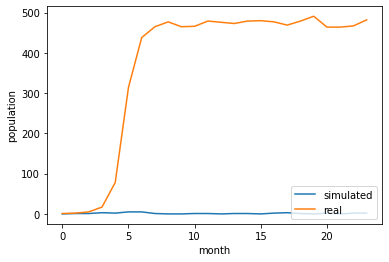

In [48]:
plt.plot(list_timeSeries_num, label='simulated')
plt.plot(list_timeSeries_num_real, label='real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

### ノック80：シミュレーションによる将来予測を実施しよう

In [49]:
T_NUM = 36

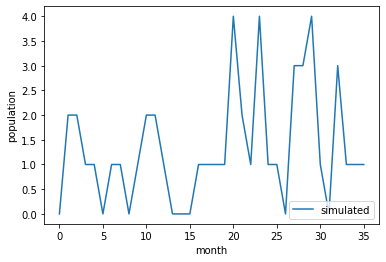

In [50]:
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_mem_links)
    list_timeSeries.append(list_active.copy())

list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num, label='simulated')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()